In [14]:
crime_data = read.csv("crime_v2.csv")

In [15]:
head(crime_data)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [16]:
# 1    county|               county identifier
# 2      year|                            1987
# 3    crmrte|     crimes committed per person
# 4    prbarr|         'probability' of arrest
# 5   prbconv|     'probability' of conviction
# 6   prbpris| 'probability' of prison sentence
# 7    avgsen|             avg. sentence, days
# 8     polpc|               police per capita
# 9   density|             people per sq. mile
# 10    taxpc|          tax revenue per capita
# 11     west|           =1 if in western N.C.
# 12  central|           =1 if in central N.C.
# 13    urban|                   =1 if in SMSA
# 14 pctmin80|            perc. minority, 1980
# 15     wcon|       weekly wage, construction
# 16     wtuc|    wkly wge, trns, util, commun
# 17     wtrd| wkly wge, whlesle, retail trade
# 18     wfir|    wkly wge, fin, ins, real est
# 19     wser|      wkly wge, service industry
# 20     wmfg|         wkly wge, manufacturing
# 21     wfed|         wkly wge, fed employees
# 22     wsta|       wkly wge, state employees
# 23     wloc|        wkly wge, local gov emps
# 24      mix| offense mix: face-to-face/other
# 25  pctymle|              percent young male

In [21]:
# remove NA
crime_data = crime_data[which(crime_data$county != 'NA'),]

# prbconv is factor with 92 levels, convert to numeric, probability
crime_data$prbconv = as.numeric(crime_data$prbconv)/100

In [22]:
str(crime_data)

'data.frame':	91 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.0063 0.0089 0.0013 0.0062 0.0052 0.0003 0.0059 0.0078 0.0042 0.0086 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  3

In [23]:
corr_matrix <- cor(crime_data)
round(corr_matrix[3,], 2)

Warning message in cor(crime_data):
"the standard deviation is zero"

county     year   crmrte   prbarr  prbconv  prbpris   avgsen    polpc 
    0.01       NA     1.00    -0.39    -0.40     0.05     0.03     0.17 
 density    taxpc     west  central    urban pctmin80     wcon     wtuc 
    0.73     0.45    -0.35     0.17     0.62     0.19     0.39     0.23 
    wtrd     wfir     wser     wmfg     wfed     wsta     wloc      mix 
    0.41     0.33    -0.05     0.35     0.49     0.20     0.35    -0.13 
 pctymle 
    0.29

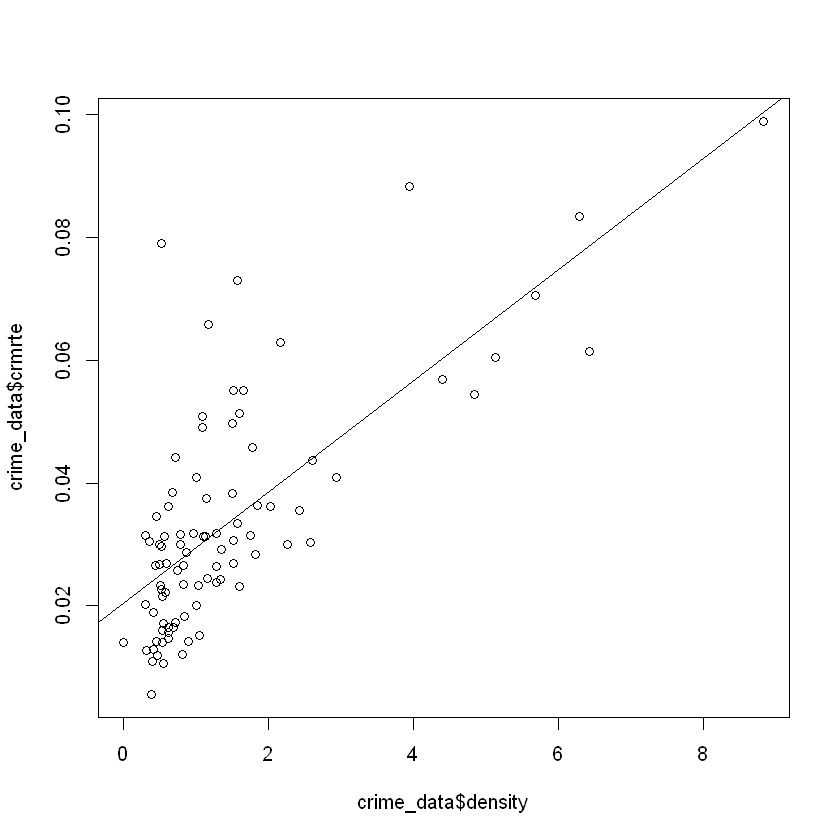

In [36]:
cr_den = lm(crmrte ~ density, data = crime_data)
plot(crime_data$density,crime_data$crmrte)
abline(cr_den)

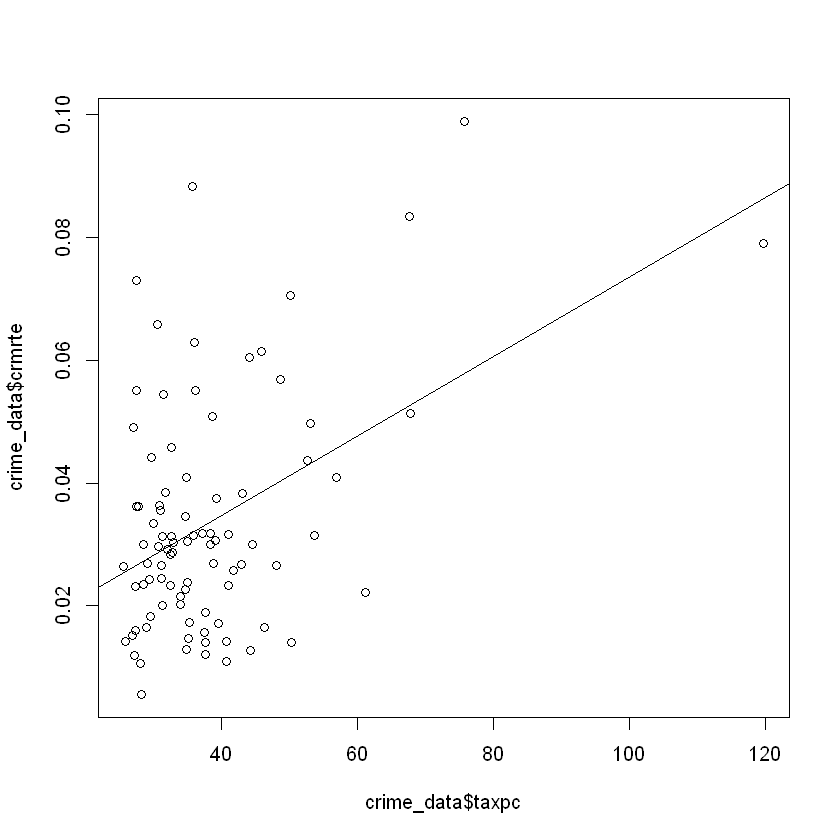

In [37]:
cr_tax = lm(crmrte ~ taxpc, data = crime_data)
plot(crime_data$taxpc,crime_data$crmrte)
abline(cr_tax)

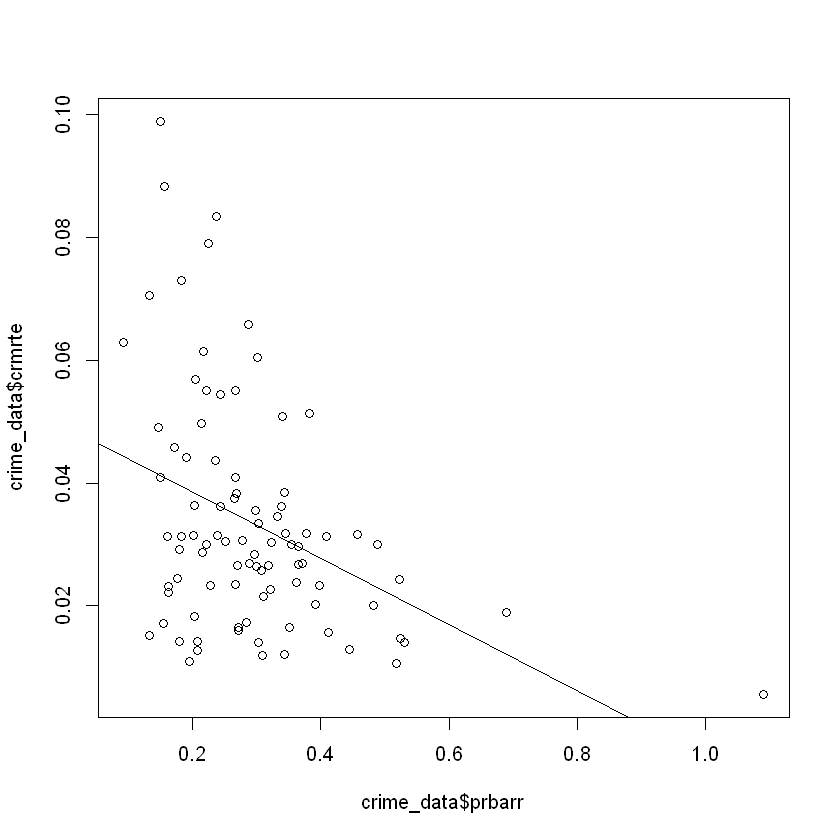

In [38]:
cr_arr = lm(crmrte ~ prbarr, data = crime_data)
plot(crime_data$prbarr,crime_data$crmrte)
abline(cr_arr)


Call:
lm(formula = crmrte ~ prbarr + prbconv, data = crime_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038256 -0.009914 -0.003163  0.008006  0.050288 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.065466   0.005057  12.945  < 2e-16 ***
prbarr      -0.058487   0.011941  -4.898 4.36e-06 ***
prbconv     -3.103146   0.626833  -4.951 3.54e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01547 on 88 degrees of freedom
Multiple R-squared:  0.3388,	Adjusted R-squared:  0.3238 
F-statistic: 22.55 on 2 and 88 DF,  p-value: 1.24e-08


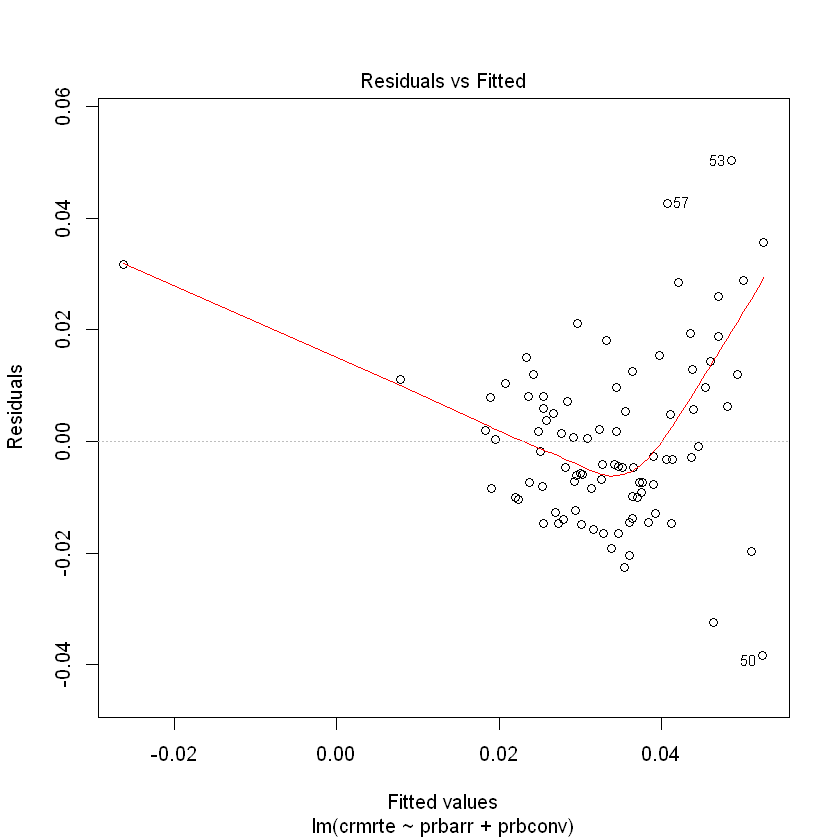

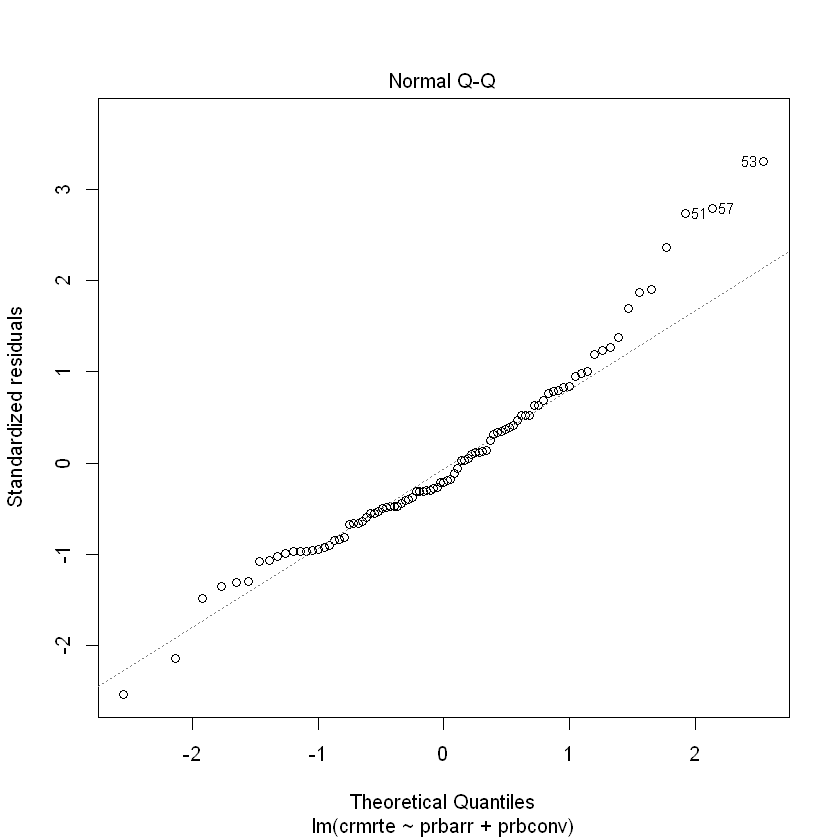

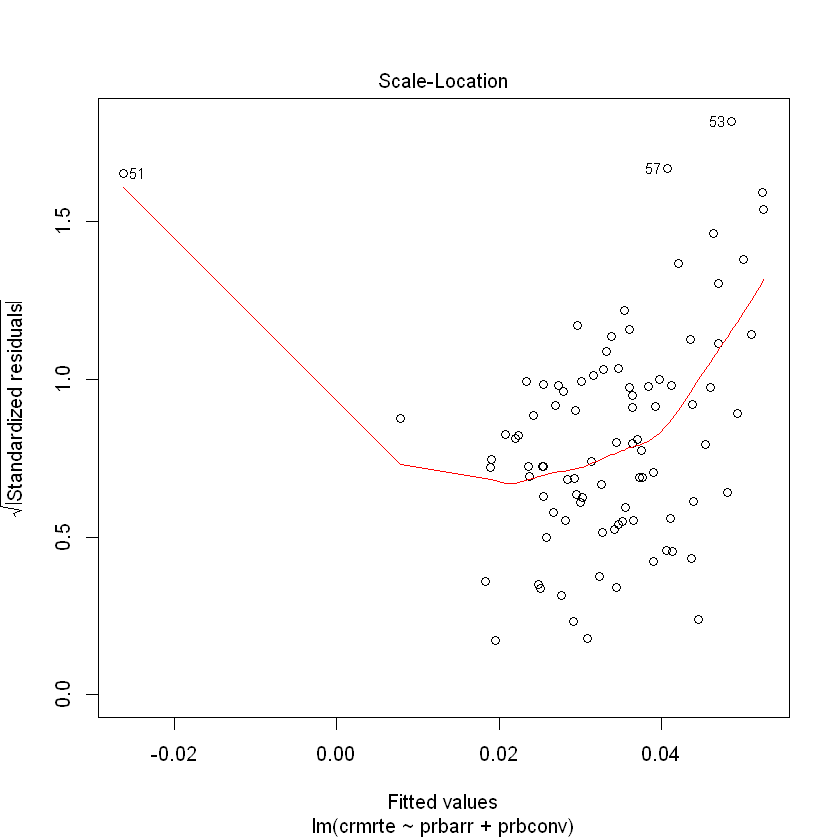

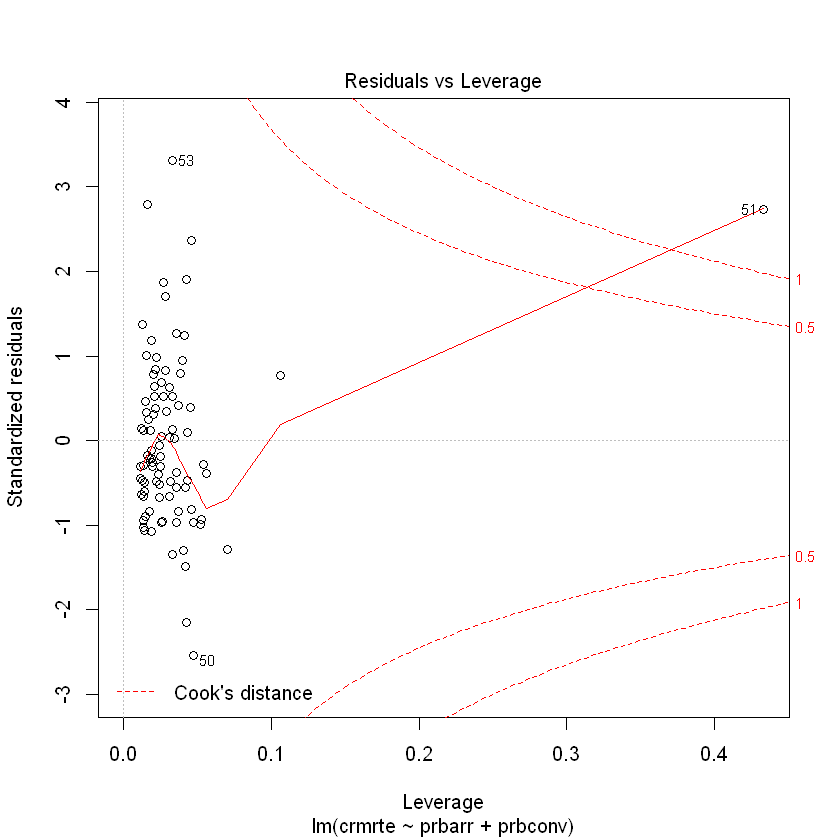

In [42]:
m1 = lm(crmrte ~ prbarr+prbconv, data = crime_data)
summary(m1)
plot(m1)


Call:
lm(formula = crmrte ~ density + urban + polpc, data = crime_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026121 -0.008633 -0.002691  0.004770  0.051343 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.019346   0.003139   6.162 2.17e-08 ***
density     0.008444   0.001590   5.311 8.27e-07 ***
urban       0.003278   0.008454   0.388    0.699    
polpc       0.999619   1.413454   0.707    0.481    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01305 on 87 degrees of freedom
Multiple R-squared:  0.535,	Adjusted R-squared:  0.519 
F-statistic: 33.37 on 3 and 87 DF,  p-value: 1.894e-14


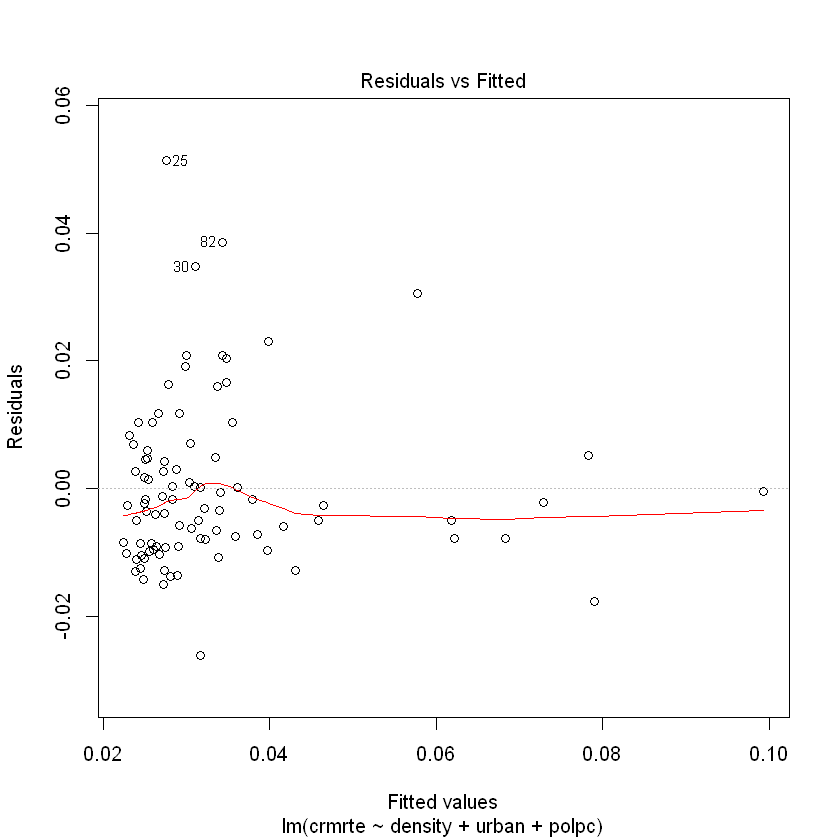

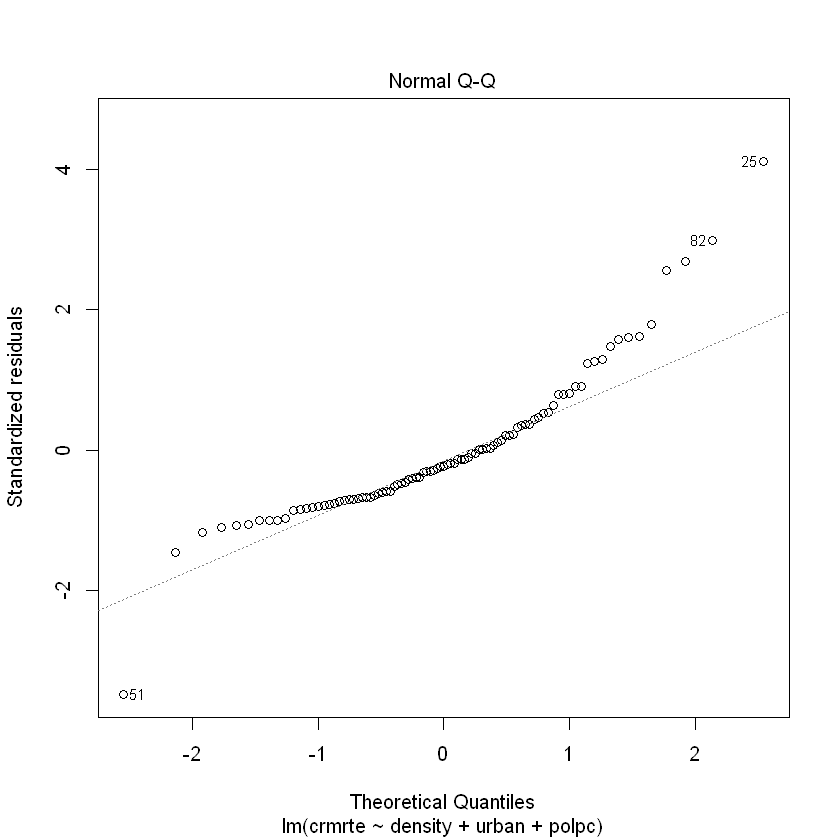

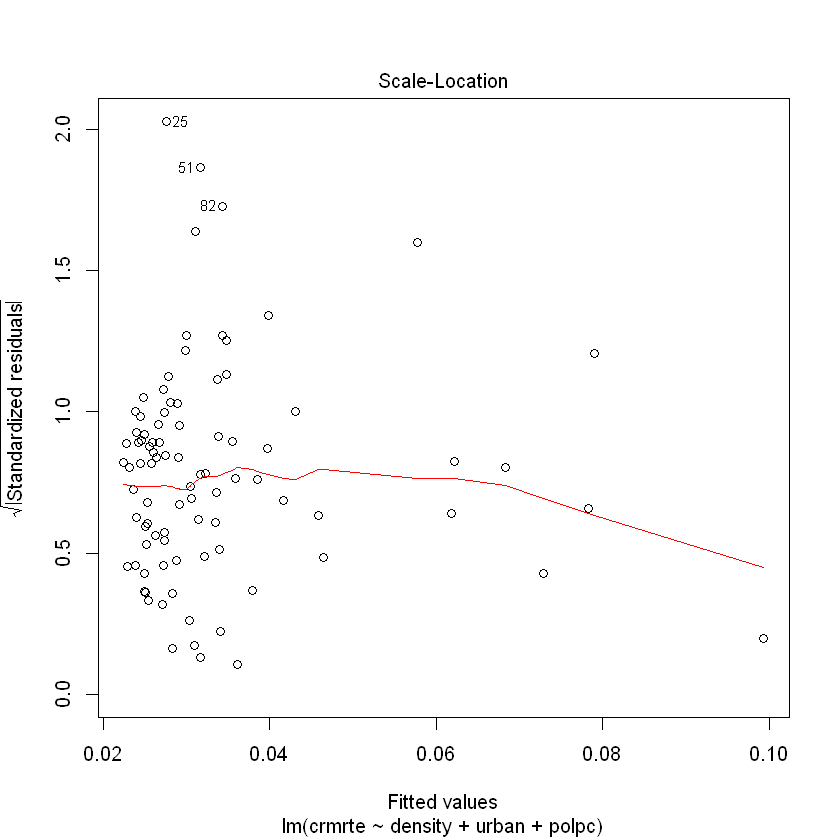

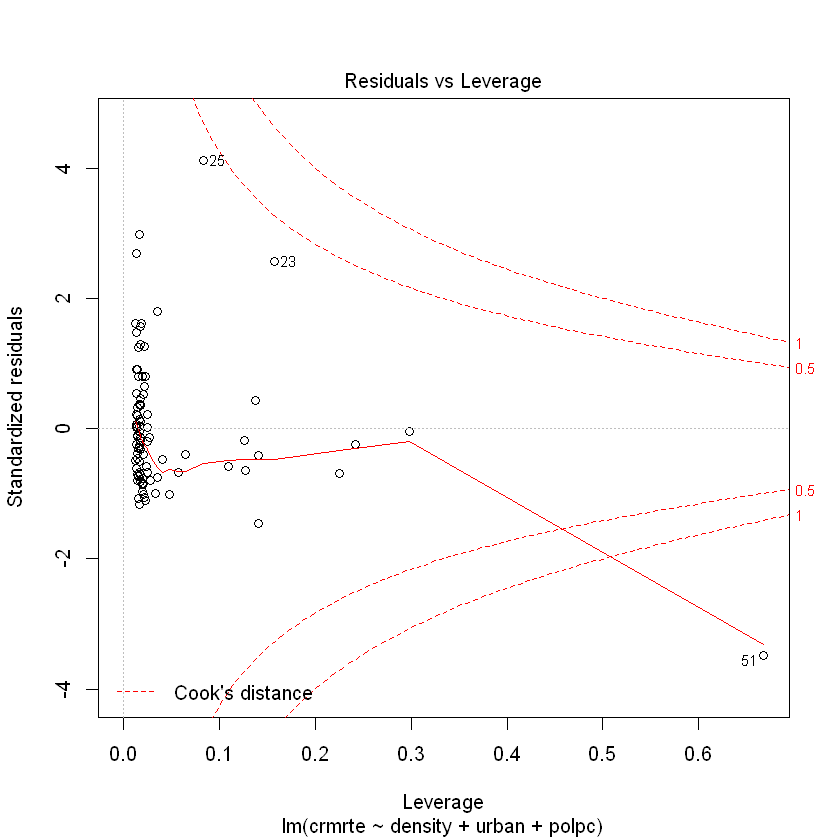

In [45]:
m2 = lm(crmrte ~ density+urban+polpc, data = crime_data)
summary(m2)
plot(m2)


Call:
lm(formula = crmrte ~ polpc + prbarr + prbconv, data = crime_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.039633 -0.007924 -0.001190  0.008643  0.042528 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.059240   0.004691  12.629  < 2e-16 ***
polpc        7.908665   1.629535   4.853 5.29e-06 ***
prbarr      -0.082812   0.011773  -7.034 4.34e-10 ***
prbconv     -3.116183   0.559255  -5.572 2.77e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0138 on 87 degrees of freedom
Multiple R-squared:  0.4797,	Adjusted R-squared:  0.4618 
F-statistic: 26.74 on 3 and 87 DF,  p-value: 2.388e-12


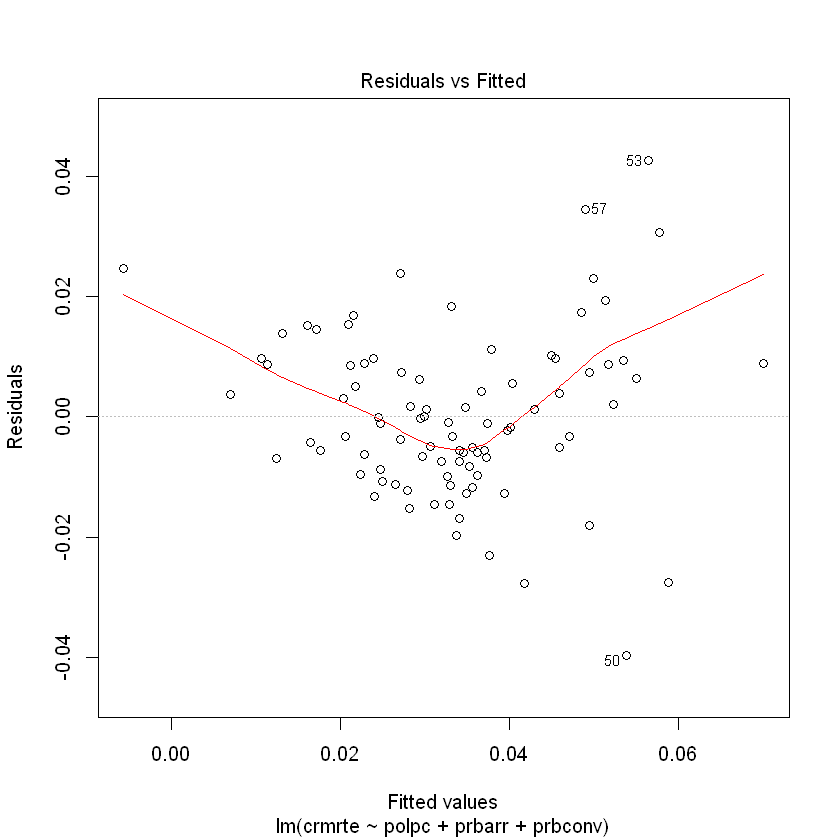

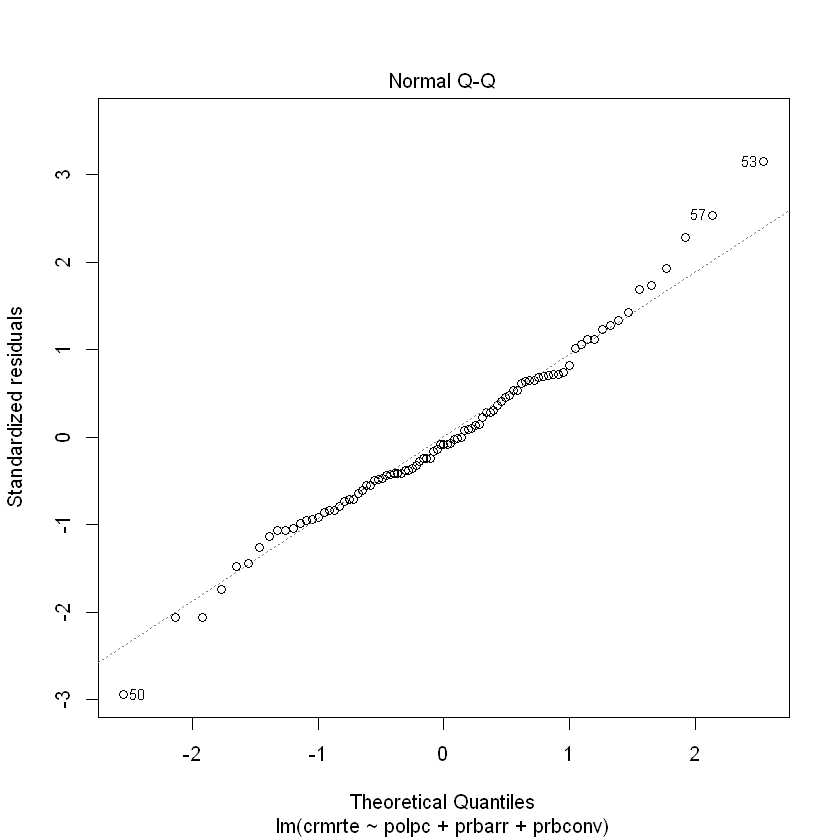

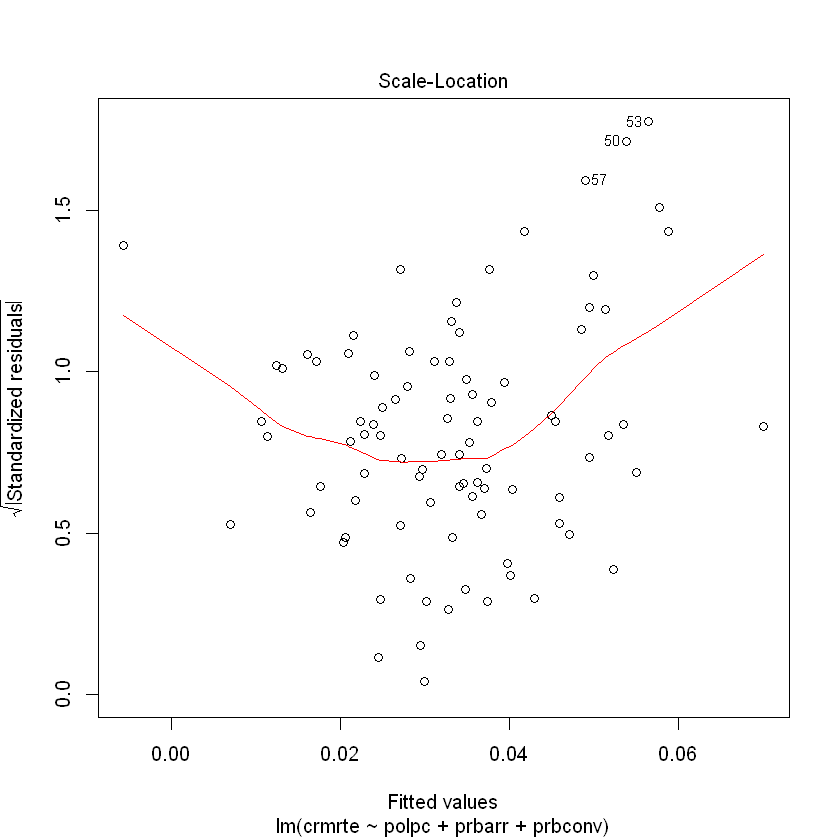

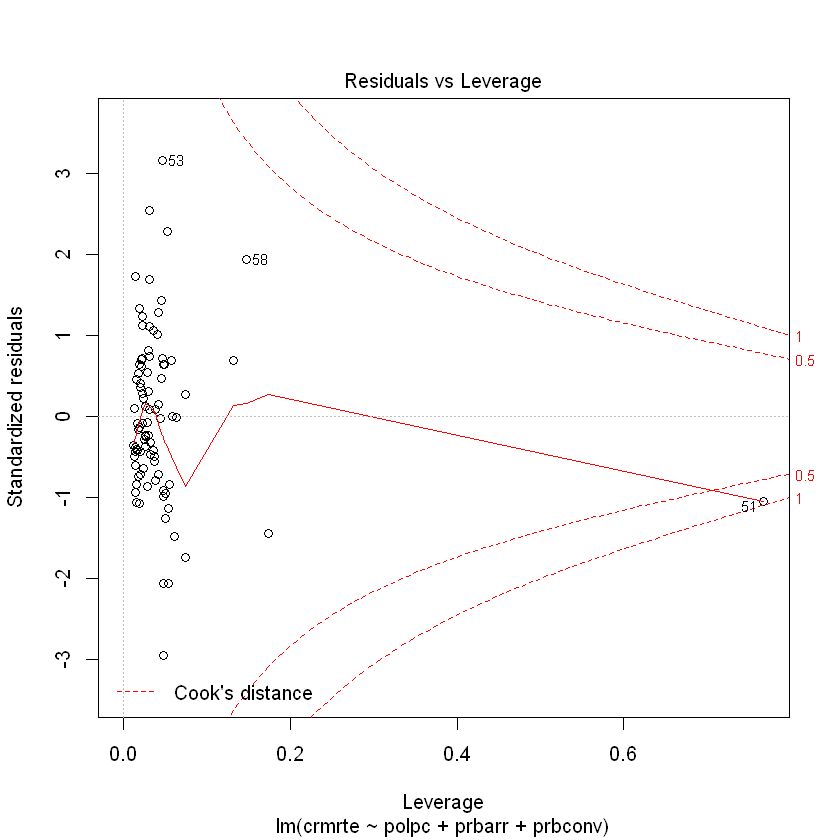

In [46]:
m3 = lm(crmrte ~ polpc + prbarr + prbconv, data = crime_data)
summary(m3)
plot(m3)

In [6]:
# Example Code

# regression plot
model <- lm(Y ~ x)
plot(x, Y, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
abline(model,col="blue",lwd=2)


# Use lm to fit a linear model.
(simmodel1 = lm(y ~ x))

# We can superimpose our fitted model over the data
abline(simmodel1)

# To get R-squared, we can use the summary command.  However,
# we won't use this command very often because the standard
# errors and p-values it provides are not robust to a condition
# we call heteroskedasticity. We will explain this in detail
# when we discuss OLS inference.
summary(simmodel1)$r.square
summary(simmodel1)


# Let's examine our residuals
u_hat = simmodel1$residuals
head(cbind(u, u_hat))



#Load the data
load("GPA1.rdata")

# see what the variables are
ls()
# alternately call:  objects()

# read the description of variables
desc

# examine a few rows of data
head(data)

# examine the ACT variable (variable A)
summary(data$ACT)
hist(data$ACT, breaks = 16:36 - 0.5, 
     main = "Histogram of ACT Scores", xlab = NULL)

# examine the colGPA variable (variable B)
summary(data$colGPA)
hist(data$colGPA, breaks = 20, main = "Histogram of College GPA", xlab = NULL)

# let's visualize the relationship
plot(data$ACT, data$colGPA, xlab = "ACT score", 
     ylab = "College GPA", main = "College GPA versus ACT score")

# let's visualize the relationship (with jitter)
plot(jitter(data$ACT), jitter(data$colGPA), xlab = "ACT score", 
     ylab = "College GPA", main = "College GPA versus ACT score")

# fit the linear model
(model1 = lm(colGPA ~ ACT, data = data))
abline(model1)

#Next, we will want to examine our data to check for any unusually
#influential cases.
#We can use a residuals vs. leverage plot for this purpose.
#{r influence}
#remove the which to see all plots
plot(model1, which = 5)

# The following code shows what would happen if we introduced an error into 
# the data set, resulting in a point with high influence.
ACT_with_error = data$ACT
ACT_with_error[5] = 80
model1_with_error = lm(data$colGPA ~ ACT_with_error)

# visualize the data with the error and the new ols line
plot(jitter(ACT_with_error), jitter(data$colGPA), xlab = "ACT score", ylab = "College GPA", main = "College GPA versus ACT score including Error")
# Add regression line to scatterplot
abline(model1_with_error)

plot(model1_with_error, which=5, main = "GPA Data with Error Introduced")


## Multivariate Linear Model Estimation
# Checks
#{r}
summary(data$hsGPA)
hist(data$hsGPA, breaks = 20, main = "High School GPA", xlab = NULL)
library(car)
scatterplotMatrix(data[,c("colGPA", "ACT", "hsGPA")], diagonal = "histogram")

(model2 = lm(colGPA ~ ACT + hsGPA, data = data))
model2$coefficients

#Let's compare the R-squares for our two models.
summary(model1)$r.square
summary(model2)$r.square

# For an assessment of model fit that penalizes extra variables, 
# we can use the Akaike Information Criterion (AIC) or the Bayesian
# Information Criterion (BIC)
AIC(model1)
AIC(model2)

#1. There can be good arguments for different specifications
#2. We want to show that an effect is robust across models
#3. We want to show that we're not cherry-picking a model that supports our argument

#Because of these reasons, we often want to present the results of
#multiple models in a *regression table*.  The stargazer package is
#a great way to create these tables.
library(stargazer)
stargazer(model1, model2, type = "latex", 
          report = "vc", # Don't report errors, since we haven't covered them
          title = "Linear Models Predicting College GPA",
          keep.stat = c("rsq", "n"),
          omit.table.layout = "n") # Omit more output related to errors




# fit the linear model

model1 = lm(wage ~ educ + exper, data = data)

# we could use the summary command, but the errors are not
# robust to heteroskedasticity.

summary(model1)

# get the residual vs. fitted value and scale-location plot
plot(model1)


# There are other tools we can use to assess the CLM assumptions.
# For normality of errors, we can examine the residuals directly.
hist(model1$residuals, breaks = 50)

# We might also consider the formal Shapiro-Wilk test of normality.
shapiro.test(model1$residuals)

# We can confirm the presense of heteroskedasticity with
# a Breusch-Pagan test.  Be careful to consider the sample
# size when interpreting this test.
bptest(model1)

# To address heteroskedasticity, we use robust standard errors.
coeftest(model1, vcov = vcovHC)
vcovHC(model1)

# Even though it's not necessary given the large sample size, 
# researchers usually enter wage into linear models in logarithmic form.
# Here, we examine this alternate specification:

model2 = lm(log(wage) ~ educ + exper, data = data)
plot(model2)

# Note how the residuals are dramatically more normal
# Also notice how the residuals vs fitted values
# and scale-location plots show much less heteroskedasticity.

# Look at the residuals directly
hist(model2$residuals, breaks = 50)
# Notice the reduced skew.

# We continue using robust standard errors, because it's good practice

coeftest(model2, vcov = vcovHC)

# Finally, we display both our models in a regression table
# We need the vectors of robust standard errors.
# We can get these from the coeftest output
(se.model1 = coeftest(model1, vcov = vcovHC)[ , "Std. Error"])

# Or directly from the robust covariance matrix.

(se.model1 = sqrt(diag(vcovHC(model1))))

(se.model2 = sqrt(diag(vcovHC(model2))))

# We pass the standard errors into stargazer through 
# the se argument.
stargazer(model1, model2, type = "text", omit.stat = "f",
          se = list(se.model1, se.model2),
          star.cutoffs = c(0.05, 0.01, 0.001))




ERROR: Error in eval(predvars, data, env): object 'y' not found
